## Linear Diffusion Equation

In this notebook, we will explore the second-order central scheme for the linear diffusion equation.

1. To run each of the following cells, use the keyboard shortcut **SHIFT** + **ENTER**, press the button ``run`` in the toolbar or find the option ``Cell > Run Cells`` from the menu bar. For more shortcuts, see ``Help > Keyboard Shortcuts``.

In [ ]:
# Configuration for visualizing the plots
%matplotlib agg
%config InlineBackend.figure_format = 'retina'

2. Similarly, import the required Python modules

In [ ]:
# Required modules
import numpy as np
import matplotlib.pyplot as plt

from nbtools import init_plot, update_plot

3. Run the cell containing the function ``diffusion``. Read the comments describing each of the steps.

In [ ]:
def diffusion(b, L, dx, dt, tf):
    # Build grid
    x = np.arange(0, L, dx)
    n = len(x)
    
    # Initialize solution
    u = np.exp(-40*(x-1/2)**2)
    ut = np.zeros(u.shape)
    
    # Initialize figure to plot    
    fig, ax = init_plot(x, u)
    line, = ax.plot(x, u, 'o-', markersize=2, color='#bd0c00')
    
    # Advance solution in time
    t = 0
    while(t < tf):
        for i in range(n):
            if i == 0:
                # Enforce periodic boundary condition at x=0
                ut[i] = u[i] + b*dt/dx**2 * (u[n-1]-2*u[i]+u[i+1])
            elif i == n-1:
                # Enforce periodic boundary condition at x=L
                ut[i] = u[i] + b*dt/dx**2 * (u[i-1]-2*u[i]+u[0])
            else:
                ut[i] = u[i] + b*dt/dx**2 * (u[i-1]-2*u[i]+u[i+1])
        u[:] = ut[:]
        t += dt
    
    # Indent next line to see animation
        update_plot(u, fig, line)

4. Now run the function ``advection`` providing
    - ``b``: The diffusion coefficient equal to ``1e-3``,
    - ``L``: The domain length equal to ``1``,
    - ``dx``: The grid spacing equal to ``0.01``,
    - ``dt``: The time step size equal to ``0.01``,
    - ``tf``: The final time equal to ``5``.
    
   Do not forget to indent the last line of the function using the ``Tab`` key if you want to see the animation. Note that the animation may be slow for small time-step sizes or ``b``.

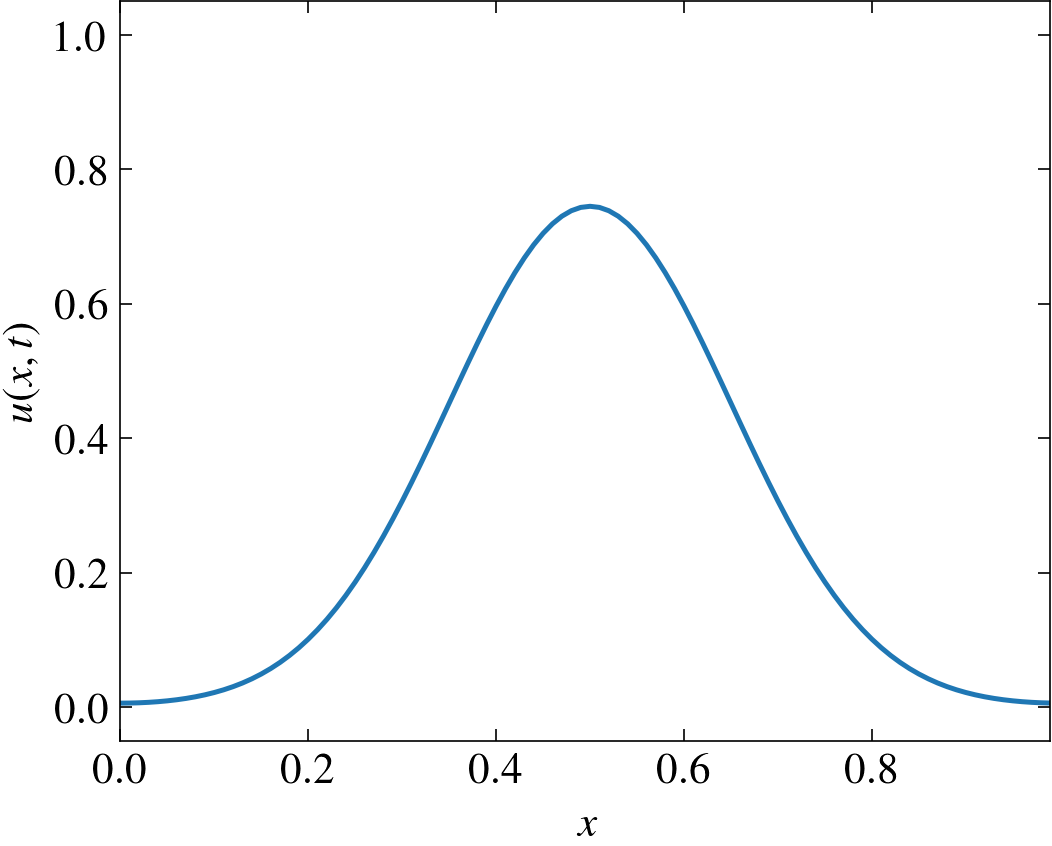

In [11]:
# Assign the provided values to the following variables
b = 
L =
dx = 
dt = 
tf = 

diffusion(b, L, dx, dt, tf)

5. Try increasing the value of ``b``. Is the simulation stable?. What can you conclude about the size of the time-step for this scheme?